<a href="https://colab.research.google.com/github/Corry-Grodek/DataScience/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import xarray as xr
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-f_wbhd8g
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-f_wbhd8g
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

**No not really, the value elpd_loo produces is more usefull in comparison to other models. Generally a more positive elpd_loo value will be better though.**

**Task2**:

Describe overfitting, in the context of this course

**Overfitting is when a model is overly specific. An example of this would be drawing a line from one data point to the next to produce a graph, instead of using a model. Adding too many interactions can also lead to overfitting**

**Task3**:

How do we mitigate overfitting?

**Chosing a model with the least amount of input variables will reduce the risk of overfitting. Adding normalizing priors will also help prevent overfitting**

**Task4**:

How do we mitigate underfitting?

**We can create multiple models using differnt combinations of variables, and then we can use elpd_loo to pick the model with the most accuracy.**

**Task5**:

Why would we want more than one predictor in a model?

**Having more than one predictor lets us create models that are more accurate, and take more factors into account. It can also counteract any innacurate data that might exist in a single variable**

**Task6**:

Can we have too many predictors? How would we now?

**It depends on the model and the variables, but yes you can have too many predicators. Having too many predictors would lead to overfitting**

**Task7**:

What is variable selection, and how does it work?

**Variable selection is done with causal models, and elpd.loo. Before creating a model you should create a causal model to see what interactions might exist and which variables are worth considering. Then you can confirm your ideas by creating models and then comparing elpd.loo.**

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**All of these models will produce somewhat similar results overall but will slightly different results per category. The model with the just the categorical variable will have the same slope for all of the categories. The categorical model with hierarchys will have different slopes for each category. The model with the interactions will have similar results to the hierarchical one.**

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

**No, we can only really visualize models in 2D with graphs, sometimes 3D graphs, and sorta 4D with color. TO visualize the whole model at once you would have to split it up into individual predictors.**

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [2]:
#have to drop incomplete rows
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#clean data
bb = bb.query('MP > 600')
bb = bb.query('`FT%` != 1.0')
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

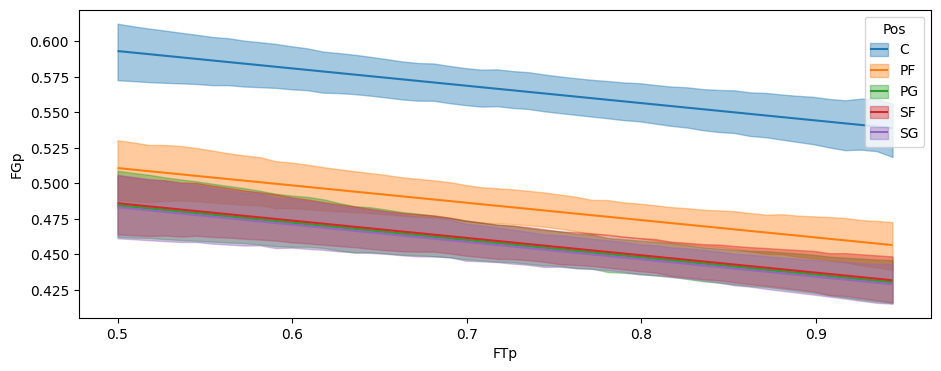

In [4]:
#normal way
model_basketballCATP = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_basketballCATP = model_basketballCATP.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketballCATP,
                               idata_basketballCATP,
                                ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 442 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

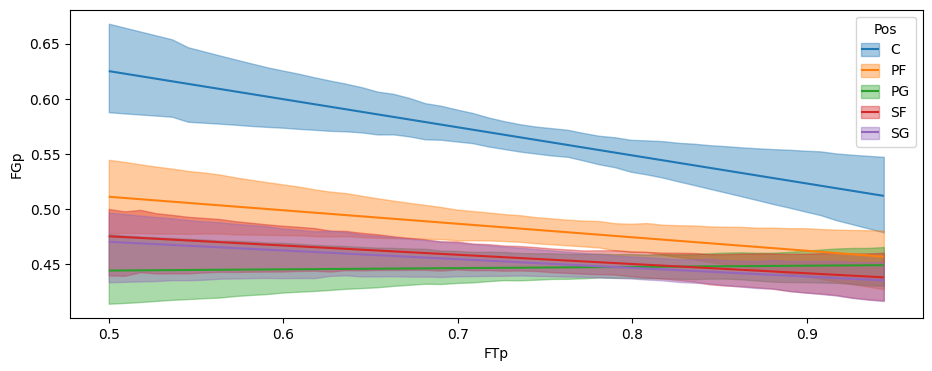

In [5]:
#hierarchy
model_basketballPH = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_basketballPH = model_basketballPH.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketballPH,
                               idata_basketballPH,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

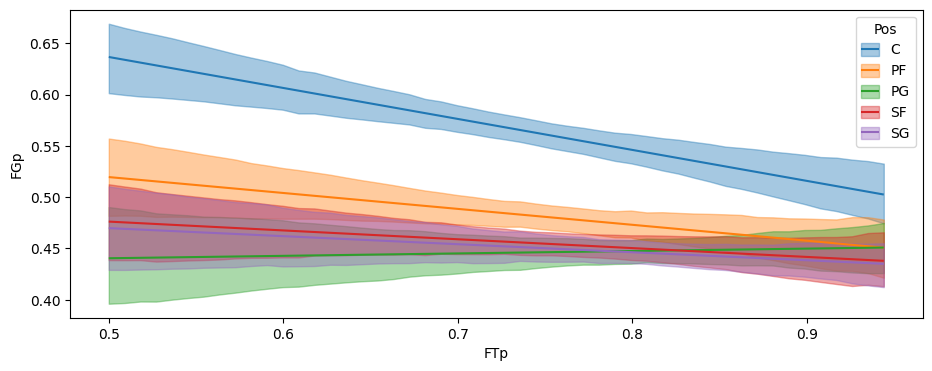

In [6]:
#interaction
model_basketballPiFT = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
idata_basketballPiFT = model_basketballPiFT.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketballPiFT,
                               idata_basketballPiFT,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

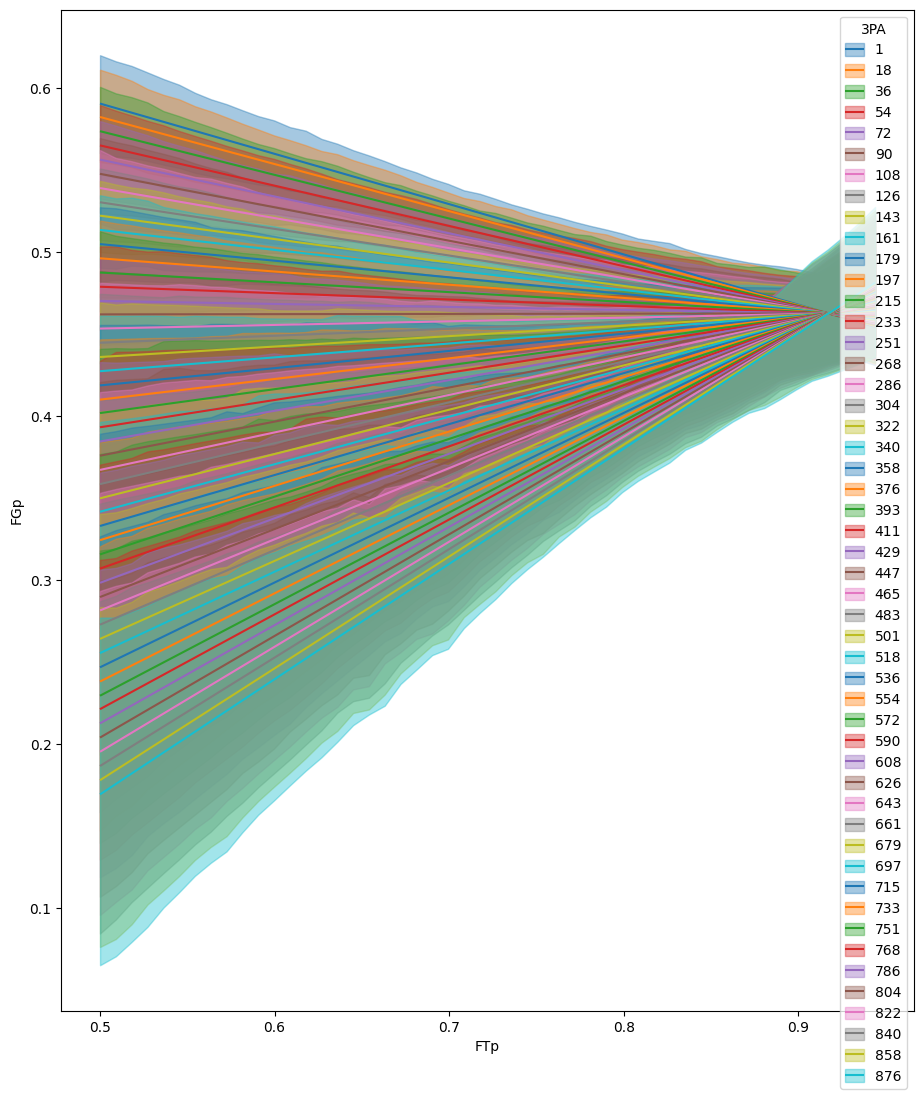

In [7]:
#all interact
model_basketballALL = bmb.Model("`FGp` ~ `FTp` + `3PA` + `FTp`:`3PA`", data=bb)
idata_basketballALL = model_basketballALL.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketballALL,
                               idata_basketballALL,
                               ["FTp","3PA"],
                               fig_kwargs={"figsize":(11, 13)})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

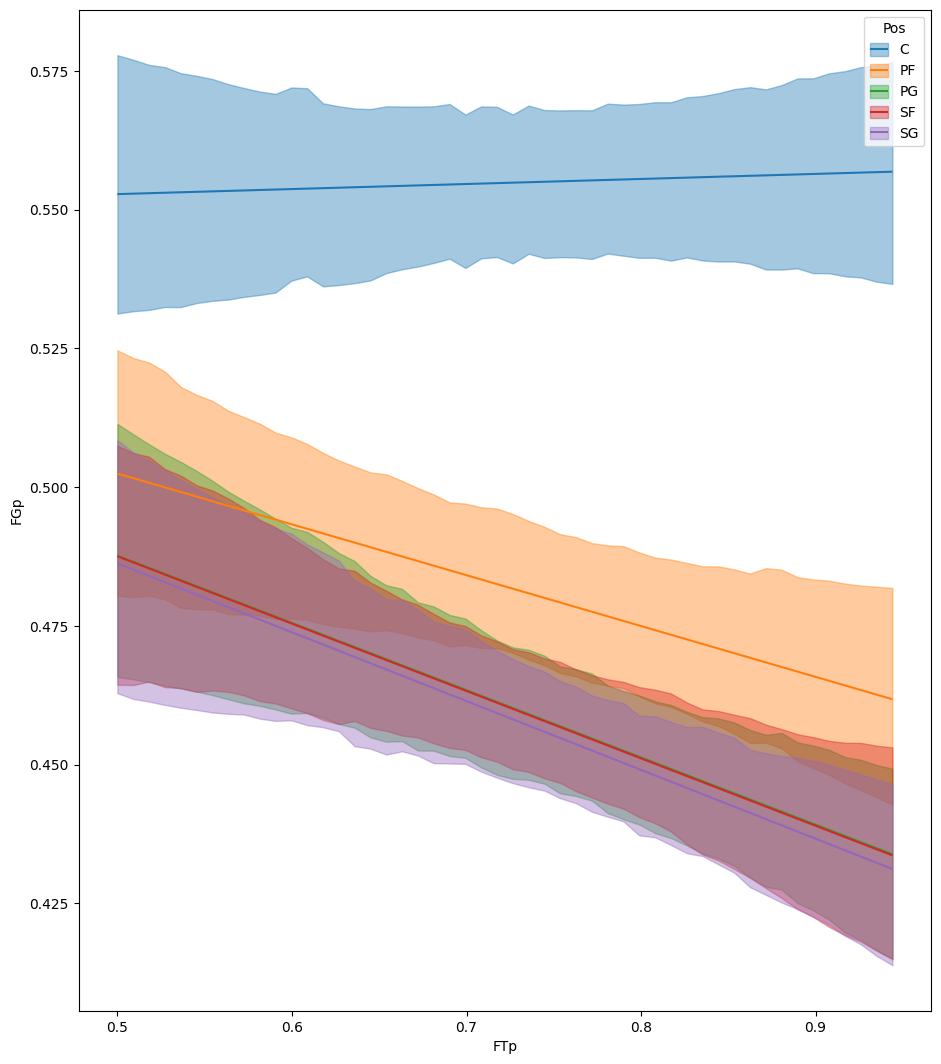

In [8]:
#some interact
model_basketballSOME = bmb.Model("`FGp` ~ `FTp` + `3PA` + `FTp`:`Pos`", data=bb)
idata_basketballSOME = model_basketballSOME.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_basketballSOME,
                               idata_basketballSOME,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 13)})

In [9]:
CompareBB = az.compare({
                         "categorical predictor":idata_basketballCATP,
                         "position hierarchy":idata_basketballPH,
                         "position interacting FTp":idata_basketballPiFT,
                         "all interact":idata_basketballALL,
                         "some interact":idata_basketballSOME
                       })
CompareBB

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
position interacting FTp,0,509.328749,13.792481,0.000000,0.397417,16.647145,0.000000,False,log
position hierarchy,1,508.771874,14.549525,0.556875,0.386472,17.417892,1.727955,False,log
categorical predictor,2,507.235624,8.416133,2.093125,0.000000,16.115065,4.580510,False,log
some interact,3,501.430546,9.067162,7.898202,0.116722,15.921630,7.668522,False,log
all interact,4,455.909105,6.489337,53.419644,0.099388,15.408445,13.108177,False,log


**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

**The comparison with elpd.loo suggests that the model using position and its interaction with free percentage is the most accurate predictor for field goal percentage. I do not know why this is in the context of basketball, but I think that having just two variables interacting will prevent the overfitting I suspect happened in the model where all variables were interacting.**